In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df=pd.read_csv('Clean_Dataset.csv')

In [6]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna()
df = df.drop_duplicates()

In [8]:
df_encoded = pd.get_dummies(df, columns=['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops'])
df_encoded = df_encoded.drop(['flight', 'class'], axis=1)

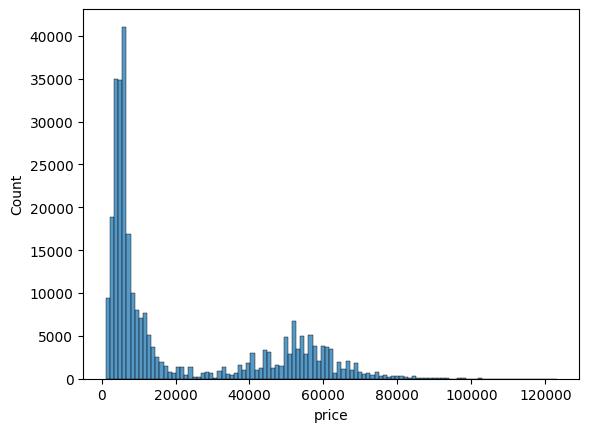

In [9]:
sns.histplot(df['price'])
plt.show()

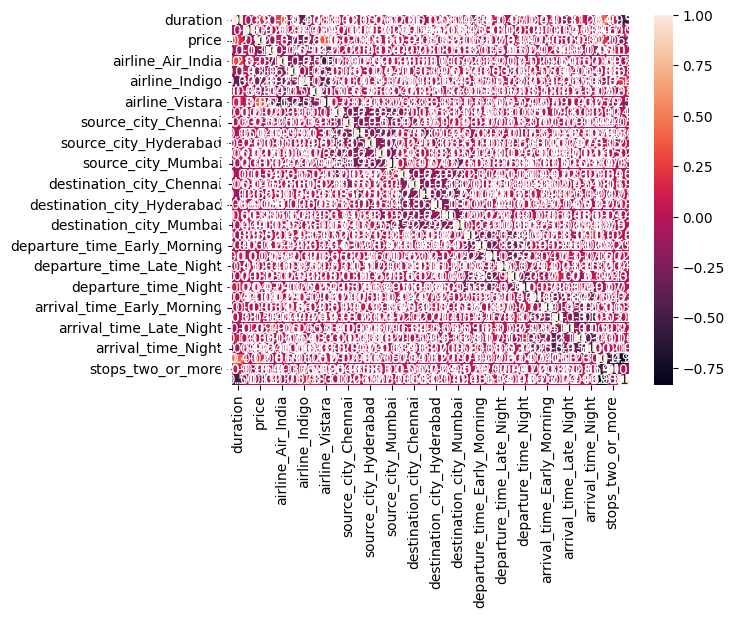

In [10]:
corr = df_encoded.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [11]:
scaler = StandardScaler()
df_encoded[['duration']] = scaler.fit_transform(df_encoded[['duration']])

In [12]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = Lasso()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+13, tolerance: 1.237e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 383678647.24567986
R-squared: 0.25568992976357463


In [15]:
print(model.score(X_test,y_test))

0.25568992976357463
